32, 9 is nan. Fill it with mean of its col.
42, 9 is nan. Fill it with mean of its col.
43, 9 is nan. Fill it with mean of its col.
44, 9 is nan. Fill it with mean of its col.
47, 9 is nan. Fill it with mean of its col.
51, 9 is nan. Fill it with mean of its col.
53, 9 is nan. Fill it with mean of its col.
61, 9 is nan. Fill it with mean of its col.
70, 9 is nan. Fill it with mean of its col.
71, 9 is nan. Fill it with mean of its col.
77, 9 is nan. Fill it with mean of its col.
78, 9 is nan. Fill it with mean of its col.
79, 9 is nan. Fill it with mean of its col.
84, 9 is nan. Fill it with mean of its col.
85, 9 is nan. Fill it with mean of its col.
90, 9 is nan. Fill it with mean of its col.
95, 9 is nan. Fill it with mean of its col.
96, 9 is nan. Fill it with mean of its col.
103, 9 is nan. Fill it with mean of its col.
114, 9 is nan. Fill it with mean of its col.
116, 9 is nan. Fill it with mean of its col.
117, 9 is nan. Fill it with mean of its col.
118, 9 is nan. Fill it with 

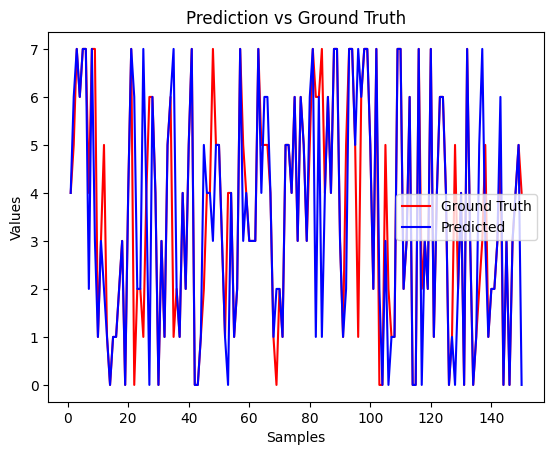

Результаты сохранены в: data1_test_result.csv


In [3]:
import requests
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
from math import sqrt
import time
import matplotlib.pyplot as plt

# Функция для скачивания файла с GitHub
def download_file_from_github(url, filename):
    response = requests.get(url)
    # Проверка, что файл не является HTML
    if '<html>' in response.text:
        raise ValueError(f"URL {url} returned an HTML page. Please check the URL.")
    with open(filename, 'wb') as file:
        file.write(response.content)

# Функция для чтения csv файла
def csv_reader(filename, delimiter=','):
    sourceData = pd.read_csv(filename, delimiter=delimiter, on_bad_lines='skip')
    sourceData.fillna(sourceData.mean(), inplace=True)  # Заполнение NaN средними значениями по столбцам
    sourceData_Arr = np.array(sourceData)
    dataset = sourceData_Arr.tolist()
    for i in range(len(dataset)):
        if str(dataset[i][-1]) != 'nan' and str(dataset[i][-1]).replace('.', '', 1).isdigit():
            dataset[i][-1] = float(dataset[i][-1])
    return dataset

# Рассчитать Евклидово расстояние
def euclideanDist(row1, row2):
    distance = 0.0
    for i in range(len(row1) - 1):
        distance += (row1[i] - row2[i]) ** 2
    return sqrt(distance)

# Рассчитать Манхэттенское расстояние
def manhattanDist(row1, row2):
    distance = 0.0
    for i in range(len(row1) - 1):
        distance += abs(row1[i] - row2[i])
    return distance

# Рассчитать Расстояние Чебышева
def chebyshevDist(row1, row2):
    distance = []
    for i in range(len(row1) - 1):
        distance.append(abs(row1[i] - row2[i]))
    return max(distance)

# Найти самых похожих соседей
def findNeighbors(train, test_row, num_neighbors):
    distance = list()
    for train_row in train:
        dist = euclideanDist(test_row, train_row)  # Использовать Евклидово расстояние
        # dist = manhattanDist(test_row, train_row)  # Использовать Манхэттенское расстояние
        # dist = chebyshevDist(test_row, train_row)  # Использовать Расстояние Чебышева
        distance.append((train_row, dist))

    distance.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distance[i][0])
    return neighbors

# Классификация с соседями
def classification(train, test_row, num_neighbors):
    neighbors = findNeighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

def main():
    # URL-адреса датасетов на GitHub
    train_url = "https://raw.githubusercontent.com/marc0cheung/BigDataPrediction_COMP/refs/heads/main/Dataset/training_1.csv"
    validation_url = "https://raw.githubusercontent.com/marc0cheung/BigDataPrediction_COMP/refs/heads/main/Dataset/validation_1.csv"
    test_url = "https://raw.githubusercontent.com/marc0cheung/BigDataPrediction_COMP/refs/heads/main/Dataset/test_1.csv"

    # Имена файлов для сохранения датасетов
    train_file = "training_1.csv"
    validation_file = "validation_1.csv"
    test_file = "test_1.csv"

    # Скачивание датасетов
    download_file_from_github(train_url, train_file)
    download_file_from_github(validation_url, validation_file)
    download_file_from_github(test_url, test_file)

    # Чтение датасетов
    k = 1
    train_dataset = csv_reader(train_file)
    validation_dataset = csv_reader(validation_file)
    test_dataset = csv_reader(test_file)

    # Обработка пропущенных значений и нормализация данных для test_1.csv
    sourceData = pd.read_csv(test_file, on_bad_lines='skip')
    for i in range(0, sourceData.shape[1] - 1):
        mean = sourceData[str(sourceData.columns[i])].mean()
        for j in range(0, len(sourceData[str(sourceData.columns[i])])):
            if pd.isnull(sourceData.iloc[j, i]):
                print(f"{j}, {i} is nan. Fill it with mean of its col.")
                sourceData.iloc[j, i] = mean

    for col in range(0, sourceData.shape[1] - 1):
        max_in_col = sourceData[str(sourceData.columns[col])].max()
        min_in_col = sourceData[str(sourceData.columns[col])].min()
        for row in range(0, len(sourceData[str(sourceData.columns[col])])):
            sourceData.iloc[row, col] = (sourceData.iloc[row, col] - min_in_col) / (max_in_col - min_in_col)

    sourceData.to_csv('data1_test_clean.csv', sep=',', index=False, header=True)

    # Проверка результатов с использованием меток в тренировочном наборе данных
    correctCount = 0
    for row in range(len(train_dataset)):
        prediction = classification(train_dataset, train_dataset[row], k)
        if train_dataset[row][-1] == prediction:
            correctCount += 1
        print('Ожидалось %d, Получено %d' % (int(train_dataset[row][-1]), int(prediction)), end='\r')

    accuracy = correctCount / len(train_dataset) * 100
    print("[training_1.csv] Строки: " + str(row) + ", Точность: " + str(accuracy))



    # Проверка результатов с использованием меток в validation_1.csv
    startTime = time.time()
    correctCount_Validation = 0
    groundTruth = []
    predResults = []
    for row in range(len(validation_dataset)):
        prediction = classification(train_dataset, validation_dataset[row], k)
        groundTruth.append(validation_dataset[row][-1])
        predResults.append(prediction)
        if validation_dataset[row][-1] == prediction:
            correctCount_Validation += 1
        print('Ожидалось %d, Получено %d' % (int(validation_dataset[row][-1]), int(prediction)), end='\r')

    accuracy = correctCount_Validation / len(validation_dataset) * 100
    print("[validation_1.csv] Строки: " + str(row) + ", Точность: " + str(accuracy))
    print("\nGroundTruth=")
    print(groundTruth)
    print("PredResults=")
    print(predResults)
    print("\nMicro-F1 Score: " + str(f1_score(groundTruth, predResults, average='micro')))
    print("Macro-F1 Score: " + str(f1_score(groundTruth, predResults, average='macro')))

    executionTime = (time.time() - startTime)
    print("Время валидации: %f" % executionTime)

    # Прогнозирование результатов в test_1.csv с использованием тренировочных данных
    print("\n\n====================Прогнозирование test_1.csv с использованием тренировочного набора данных====================\n\n")
    startTime_test = time.time()
    predResults_test = []
    for row in range(len(test_dataset)):
        prediction = classification(train_dataset, test_dataset[row], k)
        predResults_test.append(prediction)

    print(predResults_test)
    executionTime_test = (time.time() - startTime_test)
    print("Время тестирования: %f" % executionTime_test)

    # Оценка точности на тестовом наборе данных
    test_groundTruth = [row[-1] for row in test_dataset]
    test_groundTruth = [0 if pd.isnull(x) else x for x in test_groundTruth]  # Замена NaN на 0
    test_accuracy = accuracy_score(test_groundTruth, predResults_test)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

    # Построение графика точности
    epochs = range(1, len(validation_dataset) + 1)
    plt.plot(epochs, groundTruth[:len(epochs)], 'r', label='Ground Truth')
    plt.plot(epochs, predResults[:len(epochs)], 'b', label='Predicted')
    plt.title('Prediction vs Ground Truth')
    plt.xlabel('Samples')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

    # Запись результатов прогноза в test_1.csv и сохранение в новом csv файле
    test_dataFrame = pd.read_csv('test_1.csv', on_bad_lines='skip')
    for row in range(len(test_dataFrame)):
        if row < len(predResults_test):
            test_dataFrame.iloc[row, -1] = predResults_test[row]

    test_dataFrame.to_csv('data1_test_result.csv', sep=',', index=False, header=True)
    print("Результаты сохранены в: data1_test_result.csv")

if __name__ == "__main__":
    main()
